# Clustering Bank Customers
## Using PCA for data reduction
<p>Rohan Takey</p><br>

___

Dataset : Credit card dataset.<br>


___
Problem Statement : Defining different categories of customer in credit card default data by clustering them .
___

### Table Of Content :
* [Overview](#Overview)
* [Technical Aspect](#Technical-Aspect)
* [Data Handling](#Data-Handling)
    - [EDA](#EDA)
        - [Categorical Features Analysis](#Categorical-Features-Analysis)
        - [Numerical Features Analysis](#Numerical-Features-Analysis)
        - [Missing Value](#Missing-Value-handling)
        - [Outlier Detection](#Outlier-Detection)
        - [Correlation in data](#Correlation)
        - [Data Scaling](#Data-Scaling)
* [Machine Learning](#Machine-Learning)
    - [PCA](#PCA)
    - [Clustering](#Clustering)
* [Results](#Results)
* [Conclusion](#Conclusion)

### Overview

Given 'Credit Card Defaults' dataset contains different features explaining the credit card activity of user. Different credit card releted terms are used to categories the  user in specific group.

### Technical Aspect
* This Notebook contains Unsupeerwised machine learning Algorithms .
* The models used python as scripting langauge.
* Sklean Library in python used for PCA and Clustering Algorithms.
* Data Standerdization done by Sklearn scaler modules.

### Data Handling

In [1]:
# Required Librariess

## Data Handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn # Missing data visualization
from scipy.stats import zscore # Outlier detection and treatment 

## Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Principal component analysis(dimension reduction)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## Setting Defaults
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn-darkgrid')
palette=sns.color_palette('husl',10)
plt.rcParams['figure.figsize']=(20,8)
plt.rcParams['font.size']=15

In [2]:
# reading data
data=pd.read_csv('credit_card.csv')

In [3]:
# Sample
data.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
53,C10055,464.674156,0.888889,1979.22,1979.22,0.00,1981.265503,0.666667,0.666667,0.000000,0.111111,1,11,3000.0,3110.052742,132.446091,0.200000,9
1336,C11381,4359.126852,1.000000,0.00,0.00,0.00,647.542041,0.000000,0.000000,0.000000,0.333333,4,0,4500.0,972.402021,1340.320342,0.000000,12
7891,C18105,1334.012141,1.000000,0.00,0.00,0.00,152.353179,0.000000,0.000000,0.000000,0.083333,1,0,1500.0,312.029134,275.729456,0.000000,12
8704,C18941,27.202031,1.000000,538.41,0.00,538.41,0.000000,1.000000,0.000000,1.000000,0.000000,0,15,1500.0,458.430924,100.747103,0.400000,12
774,C10803,1822.431990,1.000000,177.23,70.26,106.97,0.000000,0.083333,0.083333,0.083333,0.000000,0,3,2500.0,1136.340121,428.353499,0.000000,12
1431,C11479,48.213487,1.000000,403.10,403.10,0.00,0.000000,0.666667,0.666667,0.000000,0.000000,0,8,7000.0,341.196389,158.741704,0.666667,12
6556,C16735,25.882538,1.000000,430.02,0.02,430.00,0.000000,1.000000,0.083333,0.916667,0.000000,0,19,7000.0,372.958040,174.121900,1.000000,12
6396,C16571,14.179041,0.545455,119.58,0.00,119.58,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,5000.0,157.838418,96.544553,0.181818,12
8033,C18250,81.170395,0.818182,626.50,0.00,626.50,0.000000,0.583333,0.000000,0.500000,0.000000,0,7,2500.0,445.640989,112.818984,0.454545,12
2358,C12431,516.492760,1.000000,380.00,380.00,0.00,1004.279993,0.333333,0.333333,0.000000,0.500000,11,6,1200.0,415.924157,247.451920,0.000000,12


**Attributes Information**

1) CUSTID: Identification of Credit Card holder (Categorical)<br>
2) BALANCE: Balance amount left in their account to make purchases<br>
3) BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 =
frequently updated, 0 = not frequently updated)<br>
4) PURCHASES: Amount of purchases made from account<br>
5) ONEOFFPURCHASES: Maximum purchase amount done in one-go<br>
6) INSTALLMENTSPURCHASES: Amount of purchase done in installment<br>
7) CASHADVANCE: Cash in advance given by the user<br>
8) PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1
(1 = frequently purchased, 0 = not frequently purchased)<br>
9) ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 =
frequently purchased, 0 = not frequently purchased)<br>
10) PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being
done (1 = frequently done, 0 = not frequently done)<br>
11) CASHADVANCEFREQUENCY: How frequently the cash in advance being paid<br>
12) CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"<br>
13) PURCHASESTRX: Number of purchase transactions made<br>
14) CREDITLIMIT: Limit of Credit Card for user<br>
15) PAYMENTS: Amount of Payment done by user<br>
16) MINIMUM_PAYMENTS: Minimum amount of payments made by user<br>
17) PRCFULLPAYMENT: Percent of full payment paid by user<br>
18) TENURE: Tenure of credit card service for user<br>

In [4]:
# Removing Unwanted Features from data
data=data.drop('CUST_ID',axis=1)

In [5]:
# Data seprated using dtypes
num_col=data.select_dtypes(exclude='O').columns
cat_col=data.select_dtypes(include='O').columns

print('Numerical features Are :',list(num_col))
print('\nCategorical features Are :',list(cat_col))

Numerical features Are : ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

Categorical features Are : []


* Their are no categorical fetures present in dataset.

#### EDA

In [6]:
# data Structure :
print('Entries in data :',data.shape[0])
print('Features in data :',data.shape[1])

Entries in data : 8950
Features in data : 17


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

* There are null values in data.
* Will analyis this in missing data handling.

##### Categorical Feature Analysis

**No categorical features present in data**

##### Numerical Features Analysis

In [8]:
# numericalfeatures description.
data[num_col].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


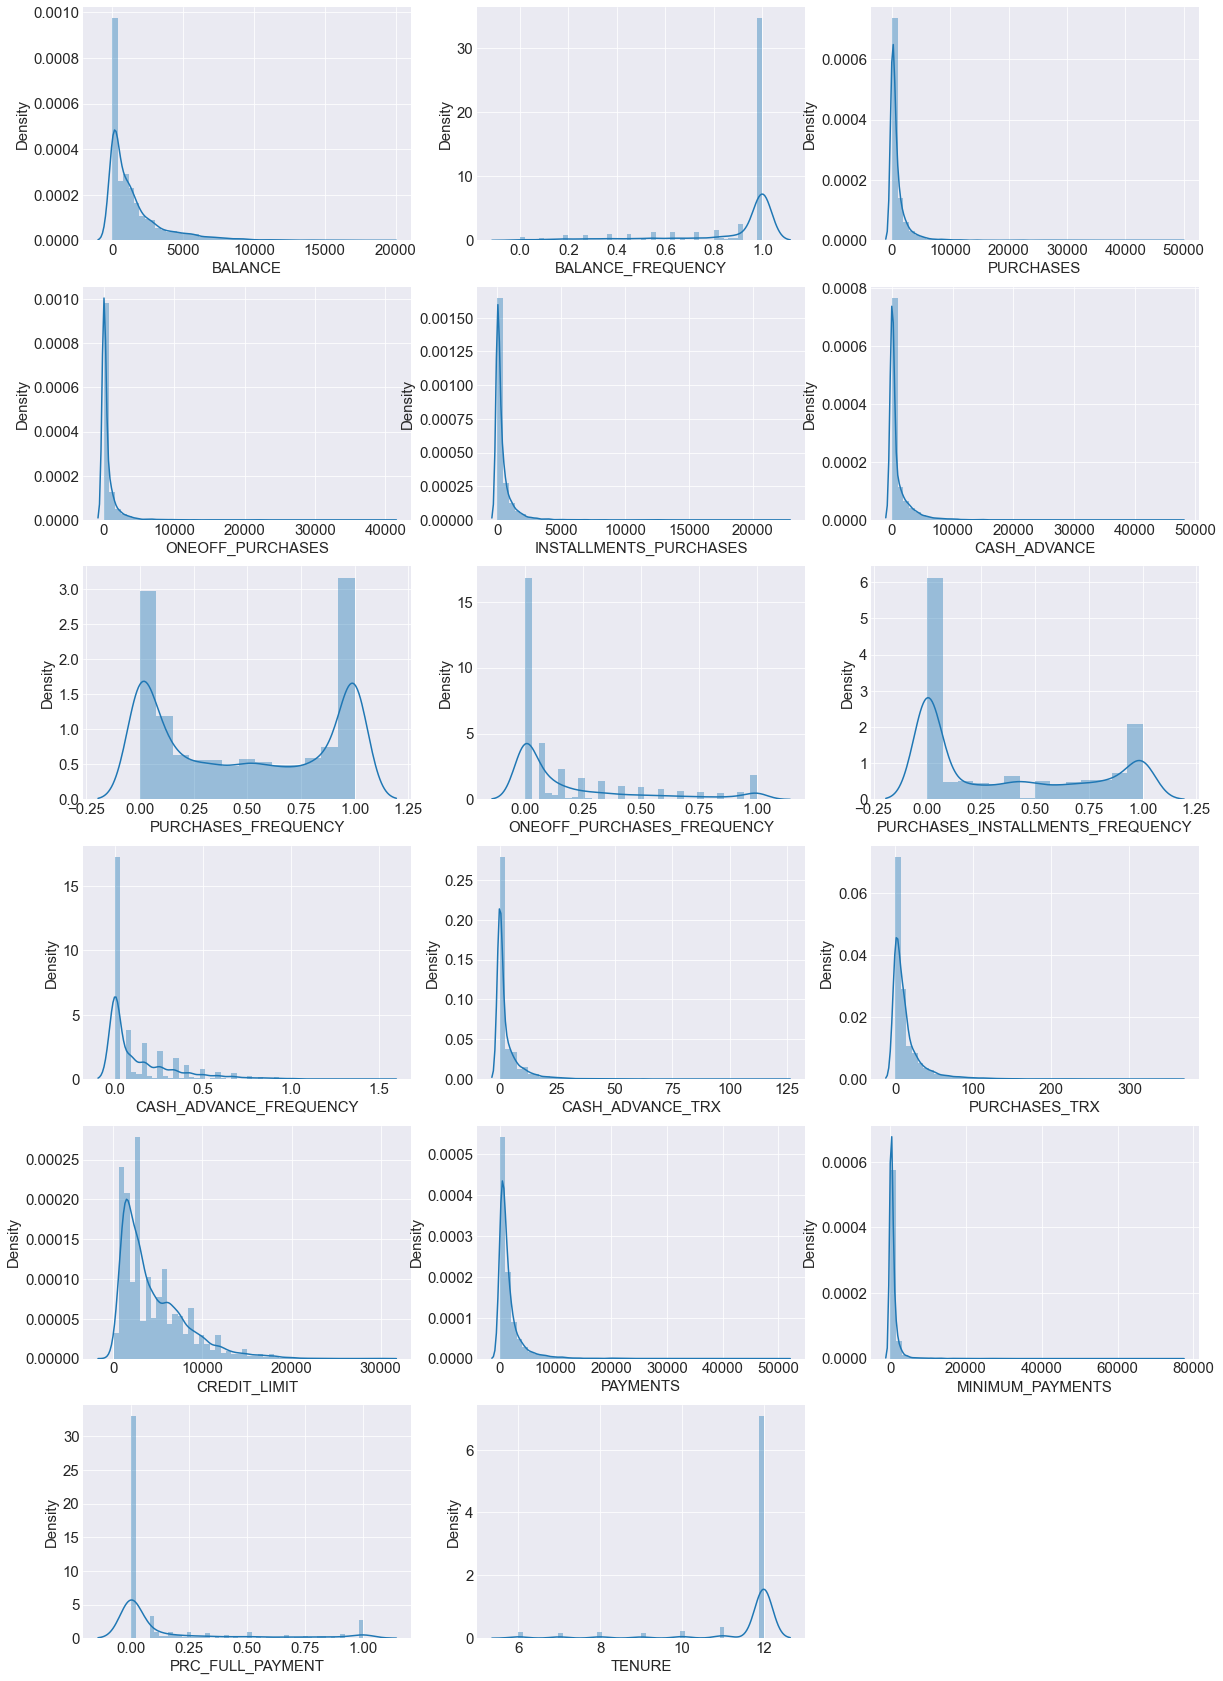

In [9]:
# Distribution of numerical features.
rows = 6
colm = 3
pos = 1
plt.figure(figsize=(20,30))
for col in data.columns:
    plt.subplot(rows,colm,pos)
    sns.distplot(data[col])
    pos+=1

* From Distribution plot of numerical features it is seen that their are outliers present in features.hence outlier treatment is required.
* Their are Discrete numeric features are present in data.
* Contineous feature are not normally distributed in data.Data scaling is required in data.

##### Missing Value Handling

[]

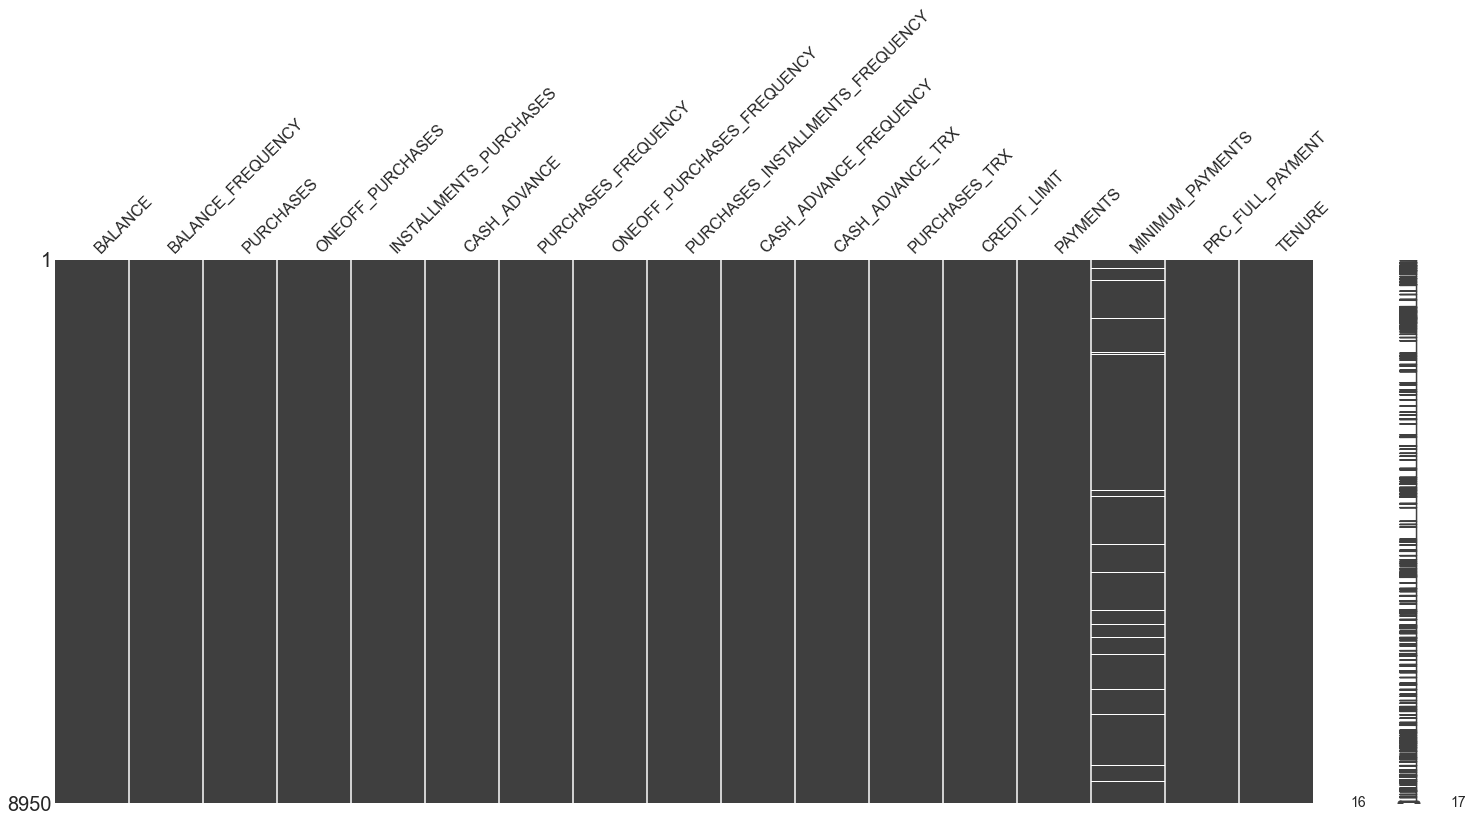

In [10]:
#Missing value matrix
mn.matrix(data)
plt.plot()

* Missing values in MINIMUM_PAYMENTS feature are observed.

In [11]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

* 313 Null values in the Minimum payments Feature .
* Will fill this values with the average minimum payment value.
* 1 null value in credit limit 

In [12]:
# Missing Value Treatment :
data.MINIMUM_PAYMENTS=data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.mean())
data.CREDIT_LIMIT=data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.mean())

In [13]:
# check for missing values
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

* Missing value Treatment is done.

##### Outlier Detection

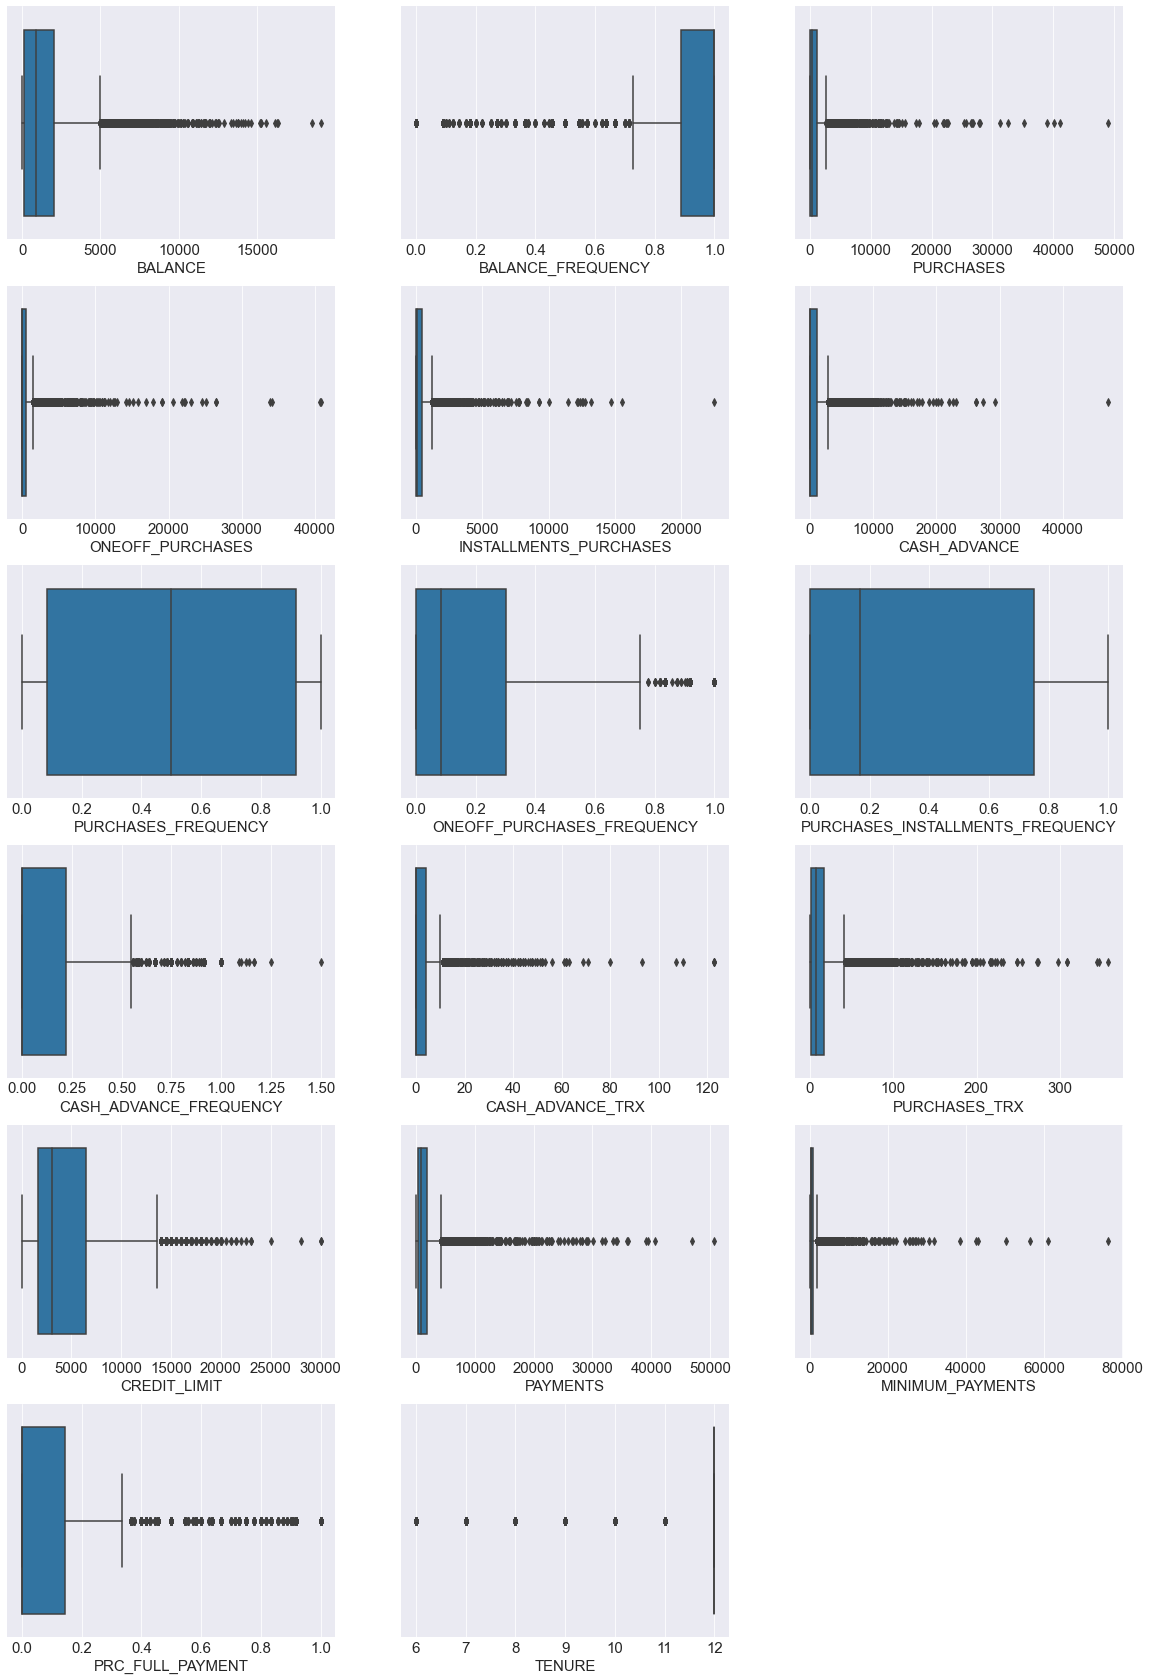

In [14]:
# Outlier Detection using Boxplot:
rows=6
colm=3
pos=1
plt.figure(figsize=(20,30))
for col in data.columns:
    plt.subplot(rows,colm,pos)
    sns.boxplot(data[col])
    pos+=1

* Outliers are present as from boxplot.
* Features that contains outliers  :
    - TENURE - Contains Discrete data and the outlier values are acceptable in this dataset.(No Treatment Required)
    - BALANCE - Contains Contineous data .balence can have high value for some users.(No Treatment Required)
    - BALANCE_FREQUENCY - Contains Discrete data and the outlier values are acceptable in this dataset .(No Treatment Required)
    - PURCHASES - Contains Contineous data .balence can have high value for some users.(No Treatment Required)
    - **ONEOFF_PURCHASES - has contineous data but for some people has very high one time purchase.(Treatment required)**
    - **INSTALLMENTS_PURCHASES - has contineous data but for some people has very high installment purchase.(Treatment required)**
    - **CASH_ADVANCE - has contineous data but has some very far values.(Treatment required)**
    - ONEOFF_PURCHASES_FREQUENCY - Contains Discrete data and the outlier values are very less in number.(No Treatment Required)
    - CASH_ADVANCE_FREQUENCY - Contains Discrete data and the outlier values are very less in number.(No Treatment Required)
    - CASH_ADVANCE_TRX - The outlier values indicates the number of transaction. can be any possible number.(No Treatment Required)
    - PURCHASES_TRX - The outlier values indicates the number of transaction. can be any possible number.(No Treatment Required)
    - CREDIT_LIMIT - Credit limit can be maximum for some clients .(No outlier treatment required)
    - PAYMENTS  - Contains Contineous data .balence can have high value for some users.(No Treatment Required)
    - MINIMUM_PAYMENTS - Contains Contineous data .balence can have high value for some users.(No Treatment Required)
    - PRC_FULL_PAYMENT - Contains Discrete data and the outlier values are very less in number.(No Treatment Required)
* will Verify it by Z score method.

In [29]:
# Finding Z score for outlier detection and replacing those values with max value of feture.

outlier_col=['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE']

for col in outlier_col:
    z = np.abs(zscore(data[col]))
    outlier_index=np.where(z>8)
    data[col].iloc[(outlier_index)]=data[col].quantile(0.99)

* Outlier Treatment Done for required features .
* The maximum value about 0.99th% of feature is used for the outlier replacement.

##### Correleation in data

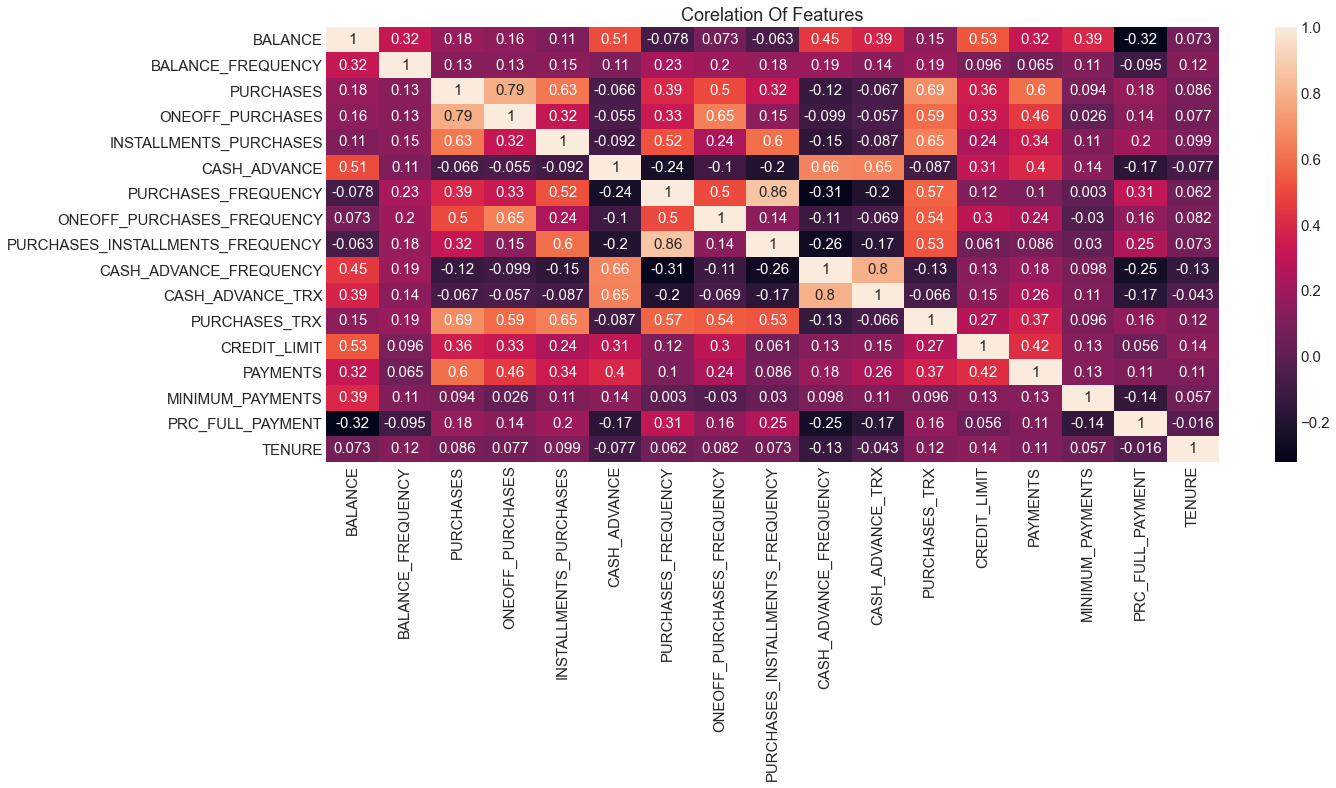

In [30]:
# Corealtion Plot is usefull to define the features that are highly correlated.
cor=data.corr()
sns.heatmap(cor,annot=True)
plt.title('Corelation Of Features')
plt.show()

* None of the features are highly corelated with each other from above plot.
* No feature has cross the limit of about 0.85 or more for corelation. 

##### Data Scaling

In [31]:
# Data In the dataset has differnet units ,that needs to be scaled at a single unit.
scaler=StandardScaler()
df=data.copy()
df.iloc[:,:]=scaler.fit_transform(data.iloc[:,:])


In [32]:
# Scaled Data :
df.sample(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7588,-0.478641,0.518084,-0.404011,-0.341276,-0.535149,-0.504097,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.430871,-0.905464,-0.528440,-0.283467,-0.525551,0.360680
5746,0.123257,0.518084,-0.469552,-0.457033,-0.535149,-0.333788,-1.221758,-0.678661,-0.916995,0.157527,0.110074,-0.591796,-0.740557,-0.268895,0.449147,-0.525551,0.360680
258,1.924515,0.518084,0.283019,-0.457033,1.650039,-0.504097,1.269843,-0.678661,1.599199,-0.675349,-0.476070,2.787634,2.475134,-0.051723,0.580329,-0.525551,0.360680
5149,-0.635852,-1.592594,0.414542,0.369627,0.672883,-0.504097,0.958393,-0.259647,1.284675,-0.675349,-0.476070,-0.229714,-0.960433,0.593404,-0.291080,0.842051,-2.628285
6204,0.460486,0.518084,-0.284915,-0.274176,-0.299653,1.026249,0.646943,-0.119974,0.550784,0.157527,-0.182998,-0.149251,-0.410743,0.691365,0.137578,-0.525551,0.360680
90,3.755512,0.518084,1.917545,0.491832,4.836139,-0.308750,1.269843,0.159367,1.389517,-0.258913,-0.329534,1.258845,1.238330,1.615375,3.845956,-0.525551,0.360680
1450,4.740673,0.518084,-0.469552,-0.457033,-0.535149,4.049514,-1.221758,-0.678661,-0.916995,3.905462,1.721969,-0.591796,2.749980,0.771960,1.513819,-0.525551,0.360680
5070,-0.685118,0.518084,-0.316059,-0.457033,-0.089462,-0.504097,1.269843,-0.678661,1.599199,-0.675349,-0.476070,0.454218,0.138948,-0.533511,-0.281294,-0.525551,0.360680
2529,0.189378,-0.084966,0.353967,0.997443,-0.535149,1.203528,0.202015,1.236833,-0.916995,3.608006,1.868505,-0.149251,0.688639,-0.520316,-0.192654,-0.525551,-3.375526
8135,-0.304513,0.518084,-0.329113,-0.457033,-0.127366,-0.504097,0.646943,-0.678661,0.970151,-0.675349,-0.476070,-0.229714,-0.905464,-0.421458,-0.229047,-0.525551,0.360680


* data is scaled and ready for further processing

### Machine Learning

* Unsupervised Machine Learning does not have any target variable. 

#### PCA

In [33]:
# Perform PCA intially- take all the features to perform PCA
pca=PCA(n_components=None)
data_pca=pca.fit_transform(df)

In [34]:
# Components :
expl_var=pca.explained_variance_ratio_
print(expl_var)

[0.27523193 0.20331153 0.08632453 0.07474281 0.06358028 0.05646331
 0.04692647 0.04261096 0.03747346 0.02777392 0.0199686  0.01809901
 0.01425424 0.0140264  0.01032663 0.0063091  0.00257681]


In [35]:
# Number of components :
len(expl_var)

17

In [36]:
evr=pca.explained_variance_ratio_.cumsum()
comp=len(evr[evr <=0.96])
print('Number of Components that gives variance about 95% :',comp)

Number of Components that gives variance about 95% : 12


In [37]:
# Explaning variation from each component
# Scree plot
# plotting a function to make a value forno of plot
def plotScree(expvar,top=None):
    if top is None:
        ev=expvar[:]
    else:
        ev=expvar[:top]
    
    #form the labels
    x_labels=['PC'+str(i) for i in range(1,len(ev)+1)]
    
    # Plot
    plt.figure(figsize=(12,8))
    ax=plt.bar(x_labels,ev,color='blue')
    msg='PC={},Variation={}%'.format(len(ev),sum(ev)*100)
    plt.title(msg)
    plt.xlabel('PC')
    plt.ylabel('Variance')
    
    return(x_labels)

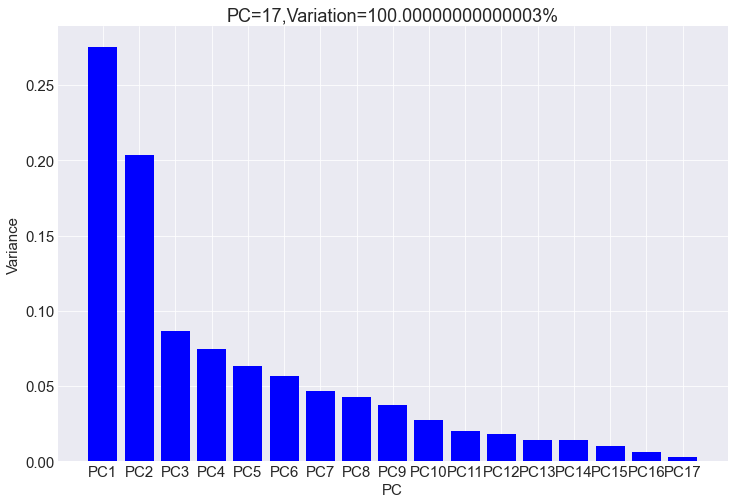

In [38]:
# Plotting scree for all components
x_lbl=plotScree(expl_var)

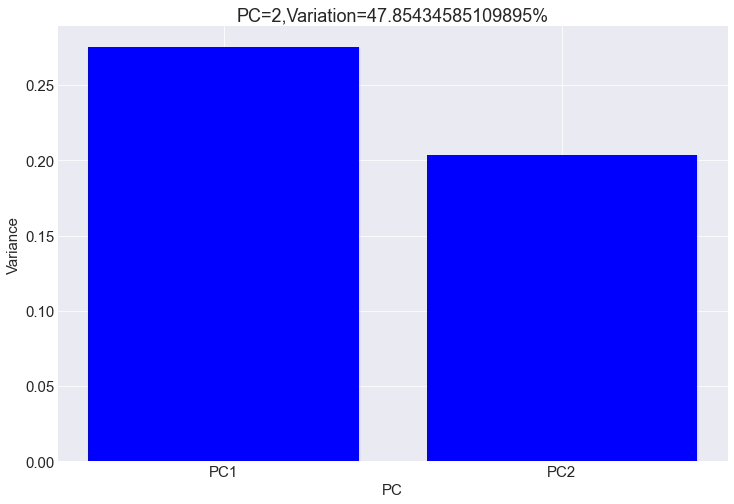

In [39]:
# maximum varience explained by first 2 components
x_lbl=plotScree(expl_var,2)

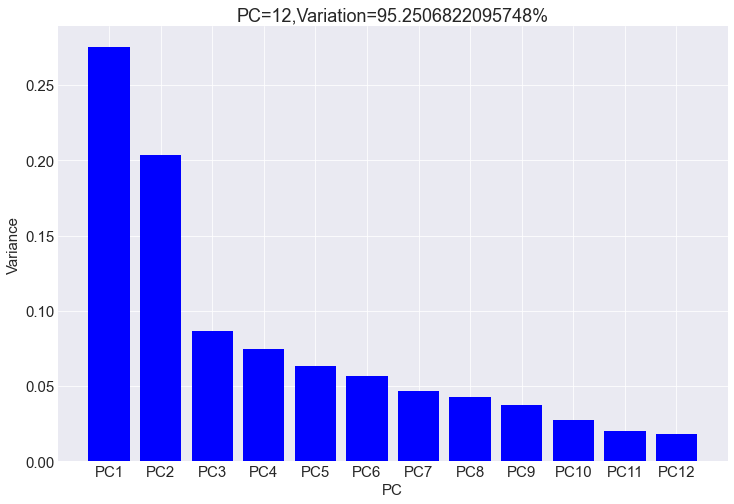

In [40]:
#Plotting scree for components that gives around 95% of variance.
x_lbl=plotScree(expl_var,12)

In [41]:
# PCA using 12 components
pca=PCA(n_components=comp)
data_pca=pca.fit_transform(df)

In [42]:
# converting data into dataframe
data_pca=pd.DataFrame(data_pca,columns=x_lbl)
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.678112,-1.219712,0.368562,0.633581,0.025907,-0.090946,0.813591,0.004394,0.248448,0.035105,-0.155644,-0.063727
1,-1.401504,2.547796,0.524721,-0.216777,0.921881,-0.904813,-0.570635,0.006294,0.664173,0.840183,-0.878305,-0.974300
2,1.030892,-0.283636,0.701385,1.357026,-1.893216,-0.246185,-1.456533,-0.270950,-0.994973,0.350665,-0.888155,0.719117
3,-0.842775,-0.026823,1.553334,1.071098,0.440584,0.091582,-0.109689,-0.544005,-0.282102,-0.571077,0.786073,0.044381
4,-1.620933,-0.819444,0.341204,0.989239,-0.449981,-0.163668,0.599885,0.198789,0.742465,0.101408,-0.321130,-0.060688
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.264297,-2.050185,-1.243583,-2.672611,-0.520181,2.699348,-1.453476,-0.024904,1.341077,0.709867,0.400208,0.041062
8946,-0.487046,-1.688515,-1.533122,-1.801835,-0.742738,3.324957,-0.767112,-0.727079,0.922954,1.111507,0.327343,0.482773
8947,-0.862443,-1.888377,-0.729744,-2.266915,-0.397385,3.051675,-1.059219,-0.508962,0.819449,0.713007,0.314726,0.100101
8948,-2.371943,-0.850720,0.699589,-1.955398,-0.583886,3.135096,-0.550433,0.037147,1.387542,-0.363811,-0.168572,0.092565


#### Clustering

In [43]:
# Model Building to find optimal K
## Elbow method .

def buildmodel(data):
    # List of error score
    wcss=[]
    # List of models for later use to calculate silhoutte score
    models=[]
    # list of k for no of custers
    list_k=list(range(2,11))

    # for every value of k build model and find wcss
    for k in list_k:
        m=KMeans(n_clusters=k).fit(data)

        # wcss--> m.intertia
        wcss.append(m.inertia_)
        # model append
        models.append(m)
    return(wcss,models,list_k)

In [44]:
# Performing Optimal K Findings.
wcss,models,list_k=buildmodel(data_pca)

[]

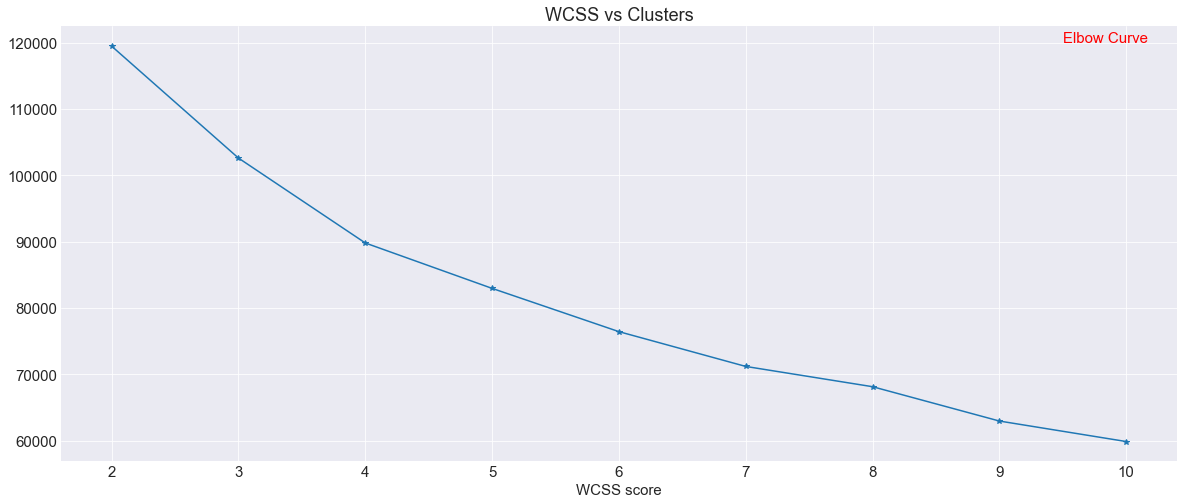

In [45]:
# elbow plot
plt.plot(list_k,wcss,marker='*')
plt.title('WCSS vs Clusters')
plt.xlabel('Clusters')
plt.xlabel('WCSS score')
plt.text(9.5,120000,'Elbow Curve',color='r')
plt.plot()

In [46]:
# confirm using silhouette score
sil_score=[silhouette_score(data_pca,m.predict(data_pca)) for m in models]
sil_score

[0.2181343627006401,
 0.2575625801578444,
 0.205889291291699,
 0.20289916611967151,
 0.21641412646361594,
 0.22963110582328913,
 0.2236882494940881,
 0.2376590774994937,
 0.22866884372141272]

In [47]:
# defining Optimal K
best_k=list_k[sil_score.index(max(sil_score))]
best_k

3

In [48]:
#model on best k
m1=KMeans(n_clusters=best_k)
clusters=m1.fit_predict(data_pca)

In [49]:
## Adding Best K to original Data :
data['Cluster']=clusters
data_pca['clusters']=clusters

In [50]:
data.sample(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
7132,9024.812044,1.000000,0.00,0.00,0.0,2750.442399,0.000000,0.000000,0.0,0.083333,2,0,9000.0,302.484224,61031.618600,0.0,12,0
2565,645.181409,0.636364,0.00,0.00,0.0,2014.386387,0.000000,0.000000,0.0,0.166667,2,0,1400.0,2185.891694,436.135143,0.0,12,1
2500,505.333425,0.909091,5176.62,5176.62,0.0,0.000000,0.666667,0.666667,0.0,0.000000,0,33,8500.0,4971.981428,172.888946,0.6,12,2
1333,5729.703345,1.000000,265.00,265.00,0.0,3543.644920,0.090909,0.090909,0.0,0.272727,6,1,14000.0,11707.953520,1162.329835,0.0,11,0
368,7760.940543,1.000000,0.00,0.00,0.0,3423.085934,0.000000,0.000000,0.0,0.500000,10,0,8000.0,2845.010795,2459.741299,0.0,12,0


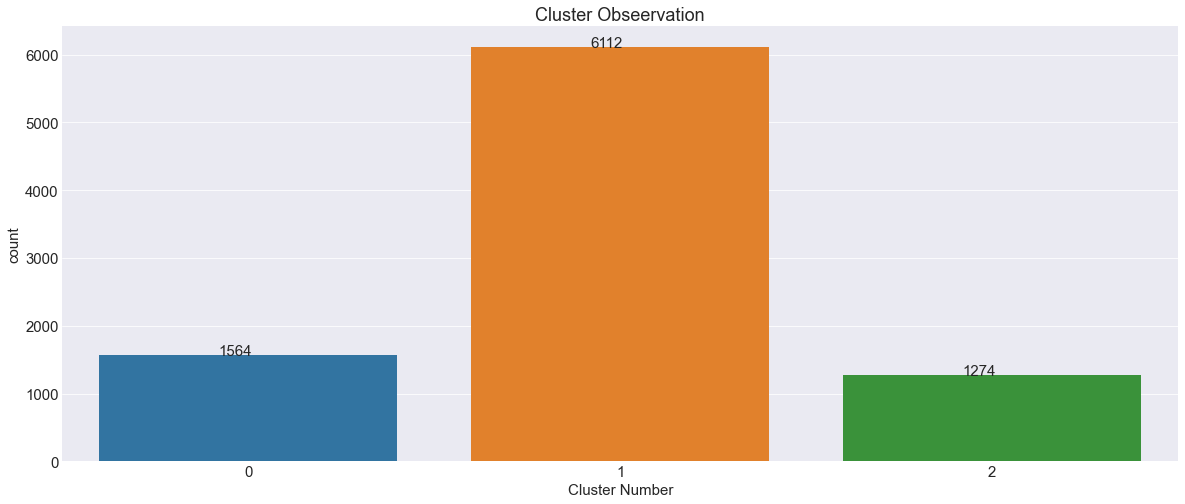

In [51]:
# Number Of Observation in each Cluster 
ax=sns.countplot(data.Cluster)
plt.title('Cluster Obseervation')
plt.xlabel('Cluster Number')
for col in ax.patches:
    ax.annotate(format(col.get_height()),(col.get_x()+col.get_width()/2.5,col.get_height()))
plt.show()

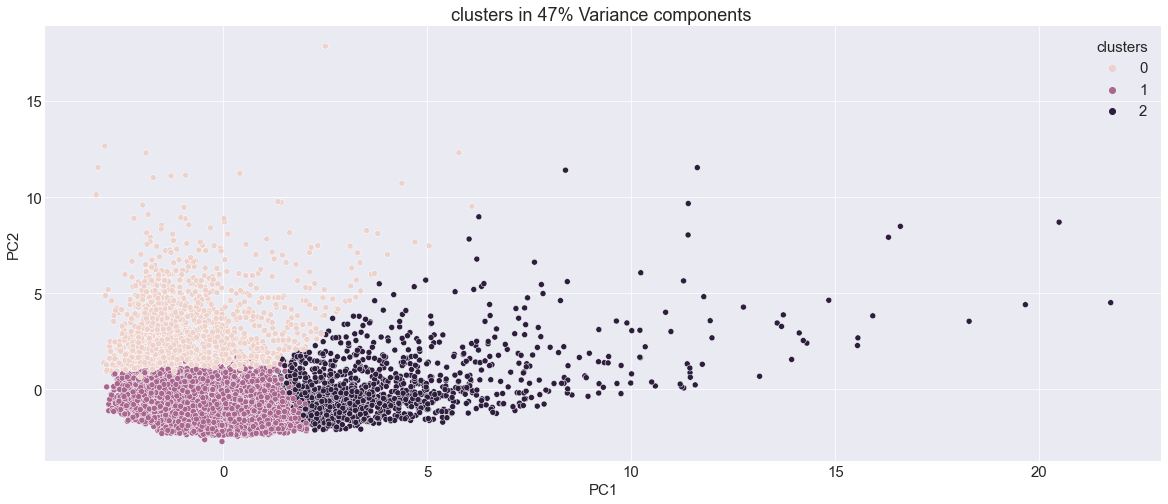

In [52]:
# Clustering in 2 primary components
sns.scatterplot(data_pca.PC1,data_pca.PC2,hue=data_pca['clusters'])
plt.title('clusters in 47% Variance components ')
plt.show()

### Results

In [53]:
result=data.Cluster.value_counts()
Result=pd.DataFrame({'Cluster':result.index,'Observations':result.values})

In [54]:
Result

,Cluster,Observations
0,1,6112
1,0,1564
2,2,1274


### Conclusion

* Out of the total data The cluster of credit card users can be divided into 3 groups .